# Simulation Code

In [29]:

#!/usr/bin/python
'''
This function generates the data for a 1D motion considering a
Piecewise constant, white noise acceleration model, equation (14)

var_q is the variance of the process noise
R is the variance of measurement noise
z is the measured data
x are the true values of the system states

example of use
python gen_data14.py 1e-3 1
'''

import sys
import numpy as np
import matplotlib.pyplot as plt
 
R = float('1')
N = 100 # data size
T = 1.0 # [s] Sampling time interval
A = np.array([[1, T], 
              [0, 1]], dtype=float)  # Transition matrix

def simulate(var_q):
    var_q = float(var_q)
    x = np.zeros((2, N)) # states are [position; speed; acceleration]
    x[:, 0] = [0, 10] # state initialization, change to give your own initial values
    G = np.array([[T**2/2], 
                  [T]], dtype=float) # Vector gain for the process noise
    w = np.random.normal(0.0, np.sqrt(var_q), N) # process noise
    for ii in range(1, N): # simulate system dynamics
      x[:, ii] = A.dot(x[:, ii-1]) + G.dot(w[ii]).T

    v = np.random.normal(0.0, np.sqrt(R), N) # measurement noise
    z = x[0, :] + v  # position measurements assuming C = [1 0 ]

    f1 = plt.figure()
    plt.plot(z, label='linear')
    plt.xlabel('Time [s]')
    plt.ylabel('Measured position')

    f2 = plt.figure()
    plt.plot(x[0,:], label='linear')
    plt.xlabel('Time [s]')
    plt.ylabel('True position [m]')

    f3 = plt.figure()
    plt.plot(x[1,:], label='linear')
    plt.xlabel('Time [s]')
    plt.ylabel('True speed [m/s]')

    return var_q, x, G, w, z 

# Kalman Filter Code

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#t_states is true states
def apply_kf(t_states,z,R,var_q):
    NEES = np.zeros(N)
    NIS = np.zeros(N)
    S = np.zeros(N)
    # initial variables
    x = np.zeros((N+1,2,1))
    x[0][0][0]=z[0]
    x[0][0][0]=(z[1]-z[0])/T
    
    k = np.zeros((N,2,1))
    u = np.zeros(N)
    v = 0 
    C = np.array(np.mat('1 0'))    
    B = np.zeros((2,1))
    _p = np.zeros((N+1,2,2))
    
    #covariance
    p = np.zeros((N+1,2,2))
    init_p=np.array([[R,R/T],
                 [R/T,2*R/(T**2)]])
    # calculate the inverse of initial covariance matrix.
    p[0]=np.linalg.inv(init_p)
    
    for i in range(0,N):
        #Eq 5
        x[i+1] = A.dot(x[i]) + B.dot(u[i])
        #Eq 6
        _p[i] = A.dot(p[i]).dot(A.T) + G.dot(var_q).dot(G.T)
        #(Eq 7) Compute the Kalman gain
        k[i] = (_p[i].dot(C.T))/(np.dot(C.dot(_p[i]),C.T) + R)
        
        #Update the estimate and the error covariance
        #Eq 8
        x[i+1] = x[i+1]+k[i]*(z[i]-np.dot(C,x[i+1]))
        #Eq 9
        p[i+1] = np.dot(1-np.dot(k[i],C),_p[i])
        
        x_diff = np.reshape(t_states[:, i], (2,1))-x[i+1]       
        NEES[i] = np.dot(np.dot(x_diff.T,np.linalg.inv(p[i+1])),x_diff)
        S[i] = np.dot(np.dot(C,_p[i]),C.T)+R
        temp = z[i]-np.dot(C,x[i+1])
        NIS[i] = temp**2/S[i]
    return NEES,NIS,k,p,_p,x

# For the first simulation: Q = 0

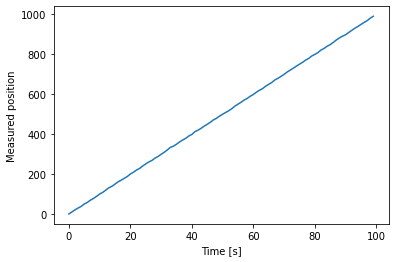

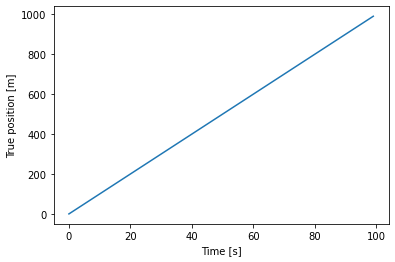

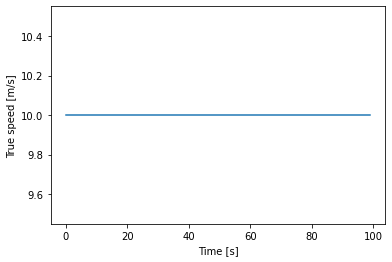

In [7]:
(var_q, x, G, w, z) = simulate('0')

In [8]:
(NEES,NIS,k,p,_p,_x) = apply_kf(x, z, R, float('9'))

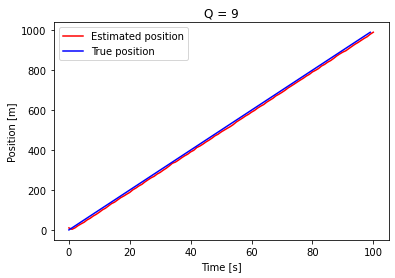

In [9]:
plt.plot(_x[:,0],'r',linestyle='-',label='Estimated position')
plt.plot(x[0,:],'b', label='True position')
plt.xlabel('Time [s]') 
plt.ylabel('Position [m]')
plt.title('Q = 9')
plt.legend() 
plt.show()

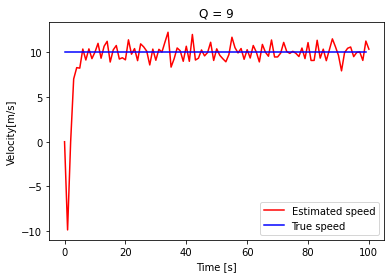

In [10]:
plt.plot(_x[:,1],'r',label='Estimated speed')
plt.plot(x[1,:],'b', label='True speed')
plt.xlabel('Time [s]') 
plt.ylabel('Velocity[m/s]')
plt.title('Q = 9')
plt.legend() 
plt.show()

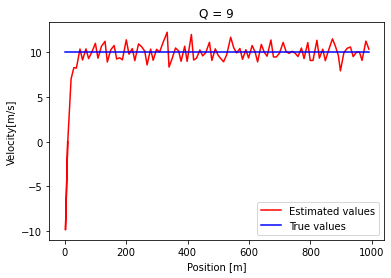

In [11]:
plt.plot(_x[:,0],_x[:,1],'r',label='Estimated values')
plt.plot(x[0,:],x[1,:],'b', label='True values')
plt.xlabel('Position [m]') 
plt.ylabel('Velocity[m/s]')
plt.title('Q = 9')
plt.legend() 
plt.show()

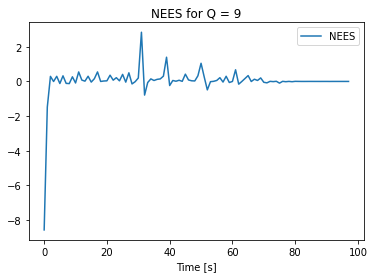

In [12]:
plt.plot(NEES[2::],label='NEES')
plt.title('NEES for Q = 9')
plt.xlabel('Time [s]')
plt.legend() 
plt.show()

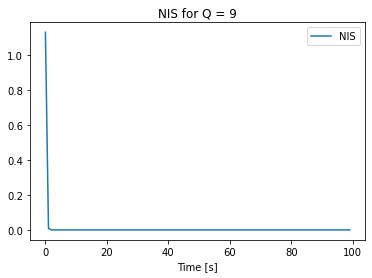

In [13]:
plt.plot(NIS[0::],label='NIS')
plt.title('NIS for Q = 9')
plt.xlabel('Time [s]')
plt.legend() 
plt.show()

# For the sencond simulation: Q = 1

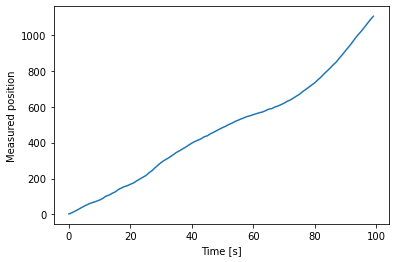

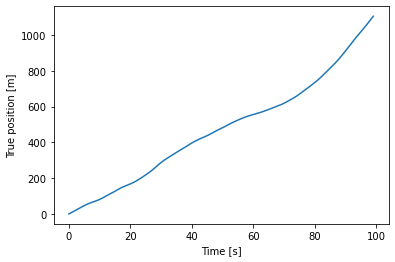

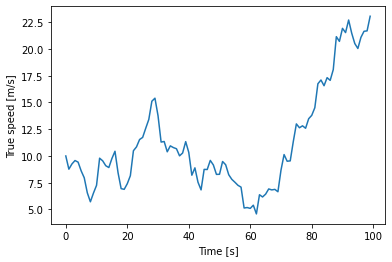

In [14]:
(var_q, x, G, w, z) = simulate('1')

In [15]:
(NEES,NIS,k,p,_p,_x) = apply_kf(x, z, R, float('5'))

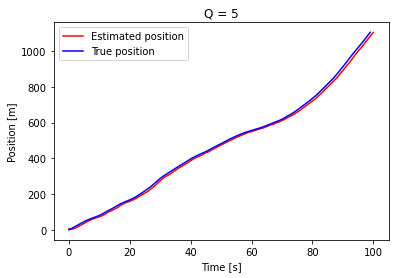

In [16]:
plt.plot(_x[:,0],'r',linestyle='-',label='Estimated position')
plt.plot(x[0,:],'b', label='True position')
plt.xlabel('Time [s]') 
plt.ylabel('Position [m]')
plt.title('Q = 5')
plt.legend() 
plt.show()

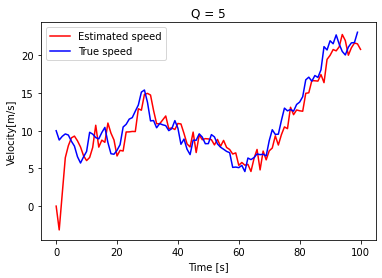

In [17]:
plt.plot(_x[:,1],'r',label='Estimated speed')
plt.plot(x[1,:],'b', label='True speed')
plt.xlabel('Time [s]') 
plt.ylabel('Velocity[m/s]')
plt.title('Q = 5')
plt.legend() 
plt.show()

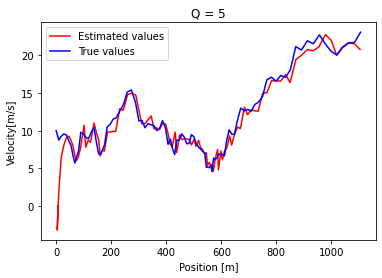

In [18]:
plt.plot(_x[:,0],_x[:,1],'r',label='Estimated values')
plt.plot(x[0,:],x[1,:],'b', label='True values')
plt.xlabel('Position [m]') 
plt.ylabel('Velocity[m/s]')
plt.title('Q = 5')
plt.legend() 
plt.show()

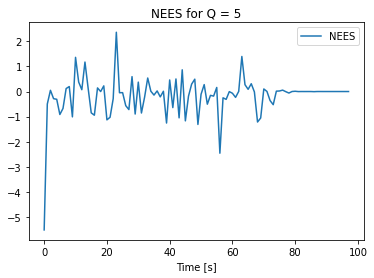

In [19]:
plt.plot(NEES[2::],label='NEES')
plt.title('NEES for Q = 5')
plt.xlabel('Time [s]')
plt.legend() 
plt.show()

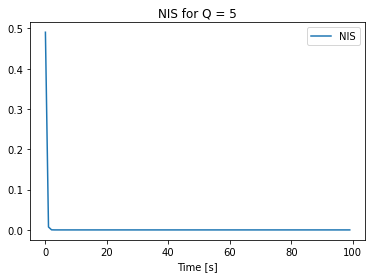

In [20]:
plt.plot(NIS[0::],label='NIS')
plt.title('NIS for Q = 5')
plt.xlabel('Time [s]')
plt.legend() 
plt.show()

# For the third simulation: Q = 9

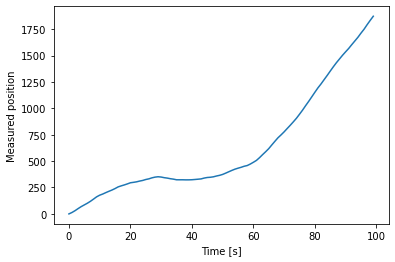

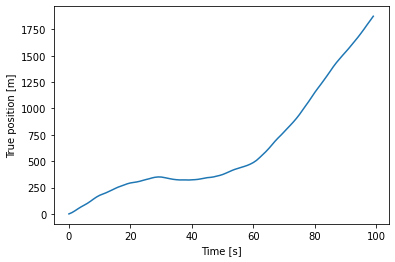

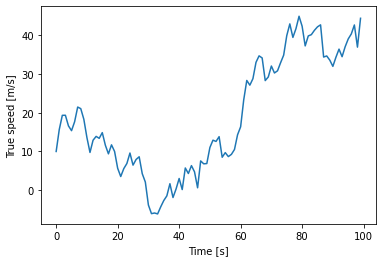

In [21]:
(var_q, x, G, w, z) = simulate('9')

In [22]:
(NEES,NIS,k,p,_p,_x) = apply_kf(x, z, R, float('1'))

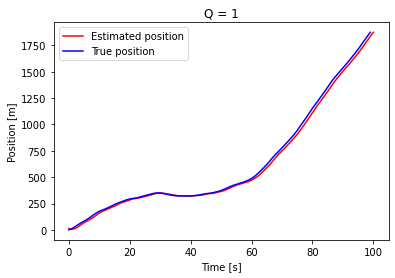

In [23]:
plt.plot(_x[:,0],'r',linestyle='-',label='Estimated position')
plt.plot(x[0,:],'b', label='True position')
plt.xlabel('Time [s]') 
plt.ylabel('Position [m]')
plt.title('Q = 1')
plt.legend() 
plt.show()

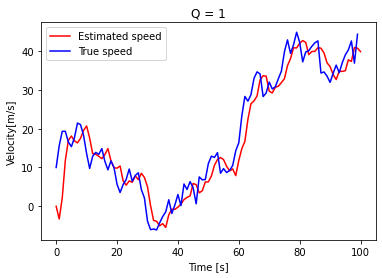

In [24]:
plt.plot(_x[:,1],'r',label='Estimated speed')
plt.plot(x[1,:],'b', label='True speed')
plt.xlabel('Time [s]') 
plt.ylabel('Velocity[m/s]')
plt.title('Q = 1')
plt.legend() 
plt.show()

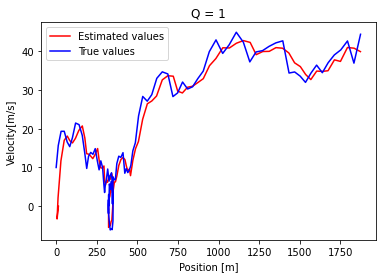

In [25]:
plt.plot(_x[:,0],_x[:,1],'r',label='Estimated values')
plt.plot(x[0,:],x[1,:],'b', label='True values')
plt.xlabel('Position [m]') 
plt.ylabel('Velocity[m/s]')
plt.title('Q = 1')
plt.legend() 
plt.show()

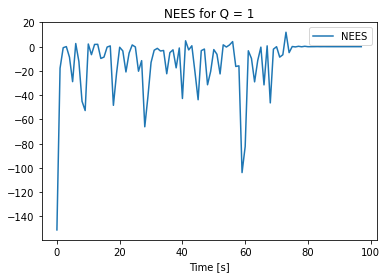

In [26]:
plt.plot(NEES[2::],label='NEES')
plt.title('NEES for Q = 1')
plt.xlabel('Time [s]')
plt.legend() 
plt.show()

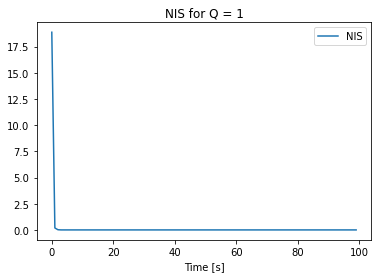

In [27]:
plt.plot(NIS[0::],label='NIS')
plt.title('NIS for Q = 1')
plt.xlabel('Time [s]')
plt.legend() 
plt.show()